# Notebook for Feature Analysis and ML 

## Imports

In [1]:
# Data
import pandas as pd
import numpy as np

In [2]:
# Misc
import os
from pprint import pprint as pp

In [3]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [61]:
# ML
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

## Config

In [5]:
# Pandas error display OFF
pd.options.mode.chained_assignment = None

# Data Path
data_path = "../data/"

## Functions

In [24]:
def fucking_correct_rounding(num):
    return int(np.floor(num) + 1) if ((num - np.floor(num)) >= 0.5) else int(np.floor(num))

## Get Data

In [59]:
# Get Features
features = pd.read_csv(data_path+'features.csv').drop(['Unnamed: 0','product_uid'], axis=1)

## Feature Analysis

In [60]:
features.head()

,relevance,q_len,com_title,com_desc,com_attr
0,3.00,2,1,1,1
1,2.50,2,1,1,1
2,3.00,1,1,1,1
3,2.33,3,1,1,3
4,2.67,2,2,2,2


## ML Modelling

In [50]:
# Split
X_train, X_test, y_train, y_test = train_test_split(features.drop('relevance',axis=1),
                                                    features['relevance'],
                                                    test_size=0.33, random_state=42)

In [66]:
# Random forest Model
mdl = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)

In [67]:
# Fit Model
mdl.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

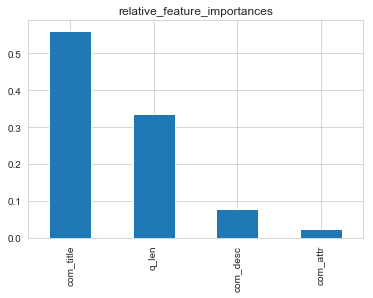

In [68]:
# Show variable importance
importances = pd.np.nan
importances = pd.Series(data=mdl.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.plot(kind='bar', title='relative_feature_importances')

In [69]:
# Predictions...
pred = mdl.predict(X_test)

In [70]:
# Metrics
print('MSE: {:.4f}'.format(mean_squared_error(y_test, pred)))

MSE: 0.3256
